# The aim of the project is to build a fake news classifier using Natural Language Processing.

In [4]:
!pip install nlp_utils

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 16.0 MB/s  0:00:00

   ---------------------------------------- 0/3 [micro-toolkit]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -----

In [1]:
## Loading necessary libraries
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
## Reading the data
df=pd.read_csv('WELFake_Dataset.csv')

In [3]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [4]:
df.shape
## There are 20800 rows and 5 columns as seen above

(72134, 4)

In [5]:
pd.set_option('display.max_colwidth', 1)
## Increasing the width of the the columns

In [6]:
df['title']
## Title contains the headline of the news

0        LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]       
1        NaN                                                                                                                                      
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]
3        Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid                                
4        SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice                                          
                                                      ...                                                                                         
72129    Russians steal research on Trump in hack of U.S. Democratic Party                                            

In [7]:
df['text']
## text contains the information regarding the headline.

0        No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be ref

In [8]:
df['text'].shape

(72134,)

In [9]:
df['label'].value_counts()
## There are 10413 'ones' and 10387 'zeroes' in the dataframe

label
1    37106
0    35028
Name: count, dtype: int64

### Class Distribution

NameError: name 'plt' is not defined

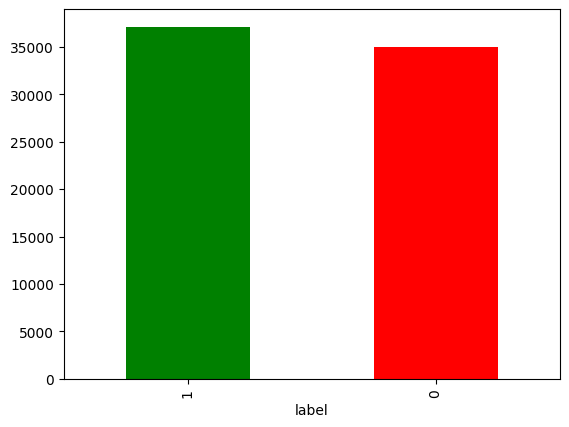

In [10]:
df['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title('Class Distribution: Real vs Fake News')
plt.ylabel('Number of articles')
plt.show()


In [11]:
df.isnull().sum()
## There are few null values present in the dataframe

Unnamed: 0    0  
title         558
text          39 
label         0  
dtype: int64

In [12]:
df=df.fillna("")
## The null values are removed using the dropna function

#  most_common_text = df['text'].mode()[0]
#  df['text'] = df['text'].fillna(most_common_text)

In [13]:
df.isnull().sum()
## As seen below there are no null values present in the dataframe now.

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [14]:
df.reset_index(inplace=True)
## As we can see in the output, the Series. reset_index() function has reset the index of the given Series.

In [15]:
df.shape

(72134, 5)

In [16]:
import re
import string

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Text cleaning

In [18]:
df['text']

0        No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be ref

In [19]:
df['text'].shape

(72134,)

## Removing stop words and stemming the text

#### In natural language processing, useless words (data), are referred to as stop words. ... Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

#### The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))  # load once outside the loop

corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))  # ensure text is string
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if word not in stop_words]  # use set
    review = ' '.join(review)
    corpus.append(review)

    # Print the first 5 processed reviews to check
    if i % 500 == 0:
        print(f"Processed review #{i}: {review[:50]}...")  # print first 200 chars
        print('-'*50)


Processed review #0: comment expect barack obama member fyf fukyoflag b...
--------------------------------------------------
Processed review #500: chandler arizona famili awok earli one morn see me...
--------------------------------------------------
Processed review #1000: jv team threat shaken dare u militari strike deep ...
--------------------------------------------------
Processed review #1500: reuter nbc suspend televis person billi bush today...
--------------------------------------------------
Processed review #2000: donald j trump may rail wall street busi elit camp...
--------------------------------------------------
Processed review #2500: washington new york reuter activist investor willi...
--------------------------------------------------
Processed review #3000: geneva reuter unit nation human right boss call me...
--------------------------------------------------
Processed review #3500: first poor melania tri part get hell deviat word t...
-----------------------

## Splitting the dataframe

In [21]:
df['text'].shape

(72134,)

In [22]:
Y=df['label']
## We select the label column as Y

In [23]:
Y.shape

(72134,)

In [24]:
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

## Making train and test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.30, random_state=40)
## We have split the data into 70 percent train and 30 percent test

In [26]:
X_train.shape

(50493,)

### Tfidf vectorizer

Understanding TfidfVectorizer Using a Simple Example
The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

In [27]:
#Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [28]:
tfidf_train.shape

(50493, 205963)

In [29]:
print(tfidf_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4138779 stored elements and shape (21641, 205963)>
  Coords	Values
  (0, 1)	0.01004449164142177
  (0, 4276)	0.016907206248313482
  (0, 4481)	0.05423466231298076
  (0, 9506)	0.020018445987828978
  (0, 9753)	0.04622799563274879
  (0, 9843)	0.008662986204080264
  (0, 9925)	0.02455636200988241
  (0, 9994)	0.03564082456754737
  (0, 10214)	0.016018459553513335
  (0, 11491)	0.035138956578238505
  (0, 11498)	0.04842616552264536
  (0, 13910)	0.015942763587518817
  (0, 14042)	0.02850975564657004
  (0, 14057)	0.05162779277941704
  (0, 14078)	0.07332857152388683
  (0, 14285)	0.018578009061783484
  (0, 14612)	0.020620070291561973
  (0, 14893)	0.01717315629137835
  (0, 14969)	0.0163803017159129
  (0, 15225)	0.015812948469554847
  (0, 15231)	0.03032249490687205
  (0, 15367)	0.02863936774010584
  (0, 15476)	0.02432513156437612
  (0, 16238)	0.02098567158094602
  (0, 16246)	0.02166314398793226
  :	:
  (21640, 139274)	0.2677485426630223
  (216

In [30]:
tfidf_vect.fit(corpus)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [31]:
# Get the feature names of `tfidf_vectorizer`
print(tfidf_vect.get_feature_names_out()[:11])

['aa' 'aaa' 'aaaaaaaand' 'aaaaackkk' 'aaaaah' 'aaaaapkfhk' 'aaaaggg'
 'aaaahhh' 'aaaahhhh' 'aaaand' 'aaaarrgh']


### Count vectorizer

Understanding CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [32]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [33]:
count_train.shape

(50493, 205963)

In [34]:
print(count_test)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4138779 stored elements and shape (21641, 205963)>
  Coords	Values
  (0, 1)	1
  (0, 4276)	1
  (0, 4481)	4
  (0, 9506)	1
  (0, 9753)	3
  (0, 9843)	1
  (0, 9925)	1
  (0, 9994)	2
  (0, 10214)	1
  (0, 11491)	2
  (0, 11498)	3
  (0, 13910)	1
  (0, 14042)	3
  (0, 14057)	6
  (0, 14078)	7
  (0, 14285)	1
  (0, 14612)	1
  (0, 14893)	1
  (0, 14969)	1
  (0, 15225)	1
  (0, 15231)	1
  (0, 15367)	2
  (0, 15476)	2
  (0, 16238)	1
  (0, 16246)	1
  :	:
  (21640, 139274)	8
  (21640, 143680)	1
  (21640, 147543)	1
  (21640, 147746)	1
  (21640, 154061)	2
  (21640, 154073)	1
  (21640, 154237)	1
  (21640, 155767)	1
  (21640, 157337)	4
  (21640, 159025)	1
  (21640, 160509)	1
  (21640, 160674)	1
  (21640, 162885)	16
  (21640, 163047)	1
  (21640, 163734)	1
  (21640, 164529)	1
  (21640, 169025)	1
  (21640, 172362)	3
  (21640, 173118)	1
  (21640, 174189)	2
  (21640, 176744)	1
  (21640, 177238)	1
  (21640, 177505)	1
  (21640, 180483)	2
  (21640, 180498)	1


In [35]:
# Get the feature names of `count_vectorizer`
print(count_vect.get_feature_names_out()[:10])

['00' '000' '0000' '00000017' '00000031' '000035' '00004' '00006' '000063'
 '00007']


## Machine learning

# 1. Naive Bayes model

### TF-Idf vectorized

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [38]:
#Applying Naive Bayes
clf = MultinomialNB()
clf.fit(tfidf_train, Y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.864
[[9180 1312]
 [1625 9524]]


In [39]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
2937 / 21641
Percentage accuracy:  86.42853842243889


In [68]:
## Plotting confusion matrix for TF-Idf vectorizer

<Axes: >

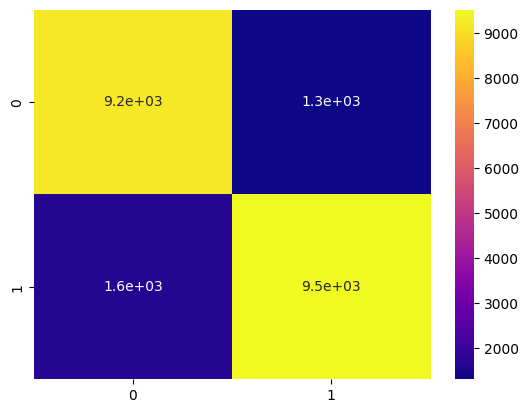

In [40]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Count Vectorized

In [41]:
#Applying Naive Bayes
clf = MultinomialNB()
clf.fit(count_train, Y_train)
pred1 = clf.predict(count_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.890
[[9563  929]
 [1461 9688]]


In [42]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
2390 / 21641
Percentage accuracy:  88.95614805230811


In [72]:
## Plotting confusion matrix for Count vectorizer.

<Axes: >

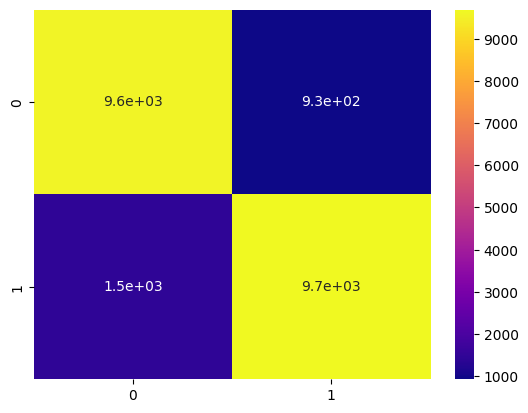

In [43]:
sns.heatmap(cm2, cmap="plasma", annot=True)

# 2. Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [45]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)

test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on test is:  0.9273138949216765
--------------------------------------------------
confusion_matrix test is:  [[ 9624   868]
 [  705 10444]]
Wrong predictions out of total
--------------------------------------------------
1573 / 21641
--------------------------------------------------


### Count Vectorized

In [46]:
RF=RandomForestClassifier().fit(count_train,Y_train)


#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on test is:  0.9316112933783097
--------------------------------------------------
confusion_matrix test is:  [[ 9788   704]
 [  776 10373]]
Wrong predictions out of total
--------------------------------------------------
1480 / 21641
--------------------------------------------------


### ROC CURVE 


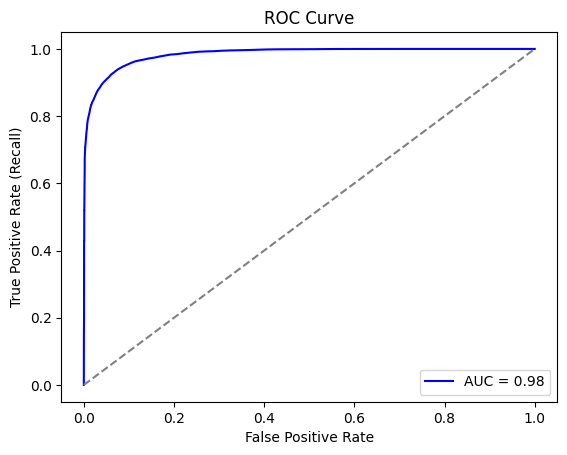

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# If Y_test is categorical ('real'/'fake'), map it to 0/1
y_true = Y_test.map({'real':0, 'fake':1}) if Y_test.dtypes == 'O' else Y_test

# Probability for the "fake" class
y_probs = RF.predict_proba(count_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc = roc_auc_score(y_true, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Precision-Recall curve

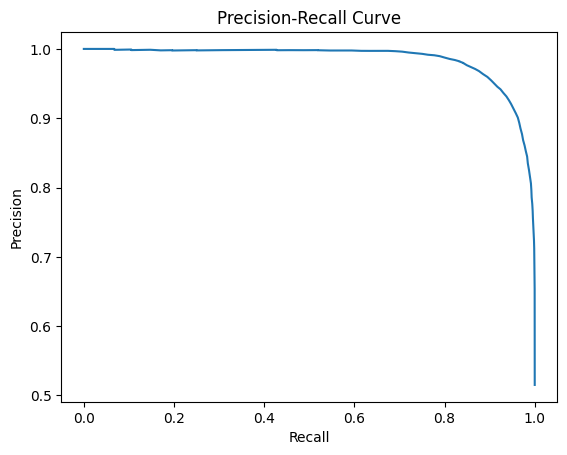

In [48]:
from sklearn.metrics import precision_recall_curve

# If Y_test is categorical ('real'/'fake'), map it to 0/1
y_true = Y_test.map({'real':0, 'fake':1}) if Y_test.dtypes == 'O' else Y_test

# Probability for the "fake" class
y_probs = RF.predict_proba(count_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Feature importance top words

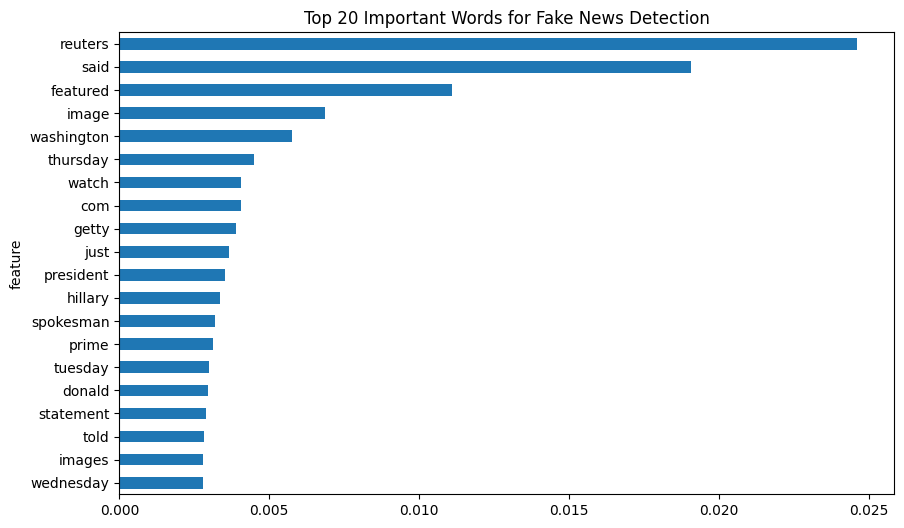

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances from Random Forest
importances = RF.feature_importances_

# Ensure you use the vectorizer that was used to transform the training data
feature_names = count_vect.get_feature_names_out()  # or tfidf_vect.get_feature_names_out()

# Create a DataFrame of features and their importance
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Select top 20 important features
top_features = feat_imp.sort_values(by='importance', ascending=False).head(20)

# Plot
top_features.plot(kind='barh', x='feature', y='importance', legend=False, figsize=(10,6))
plt.title('Top 20 Important Words for Fake News Detection')
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


### Misclassified Samples

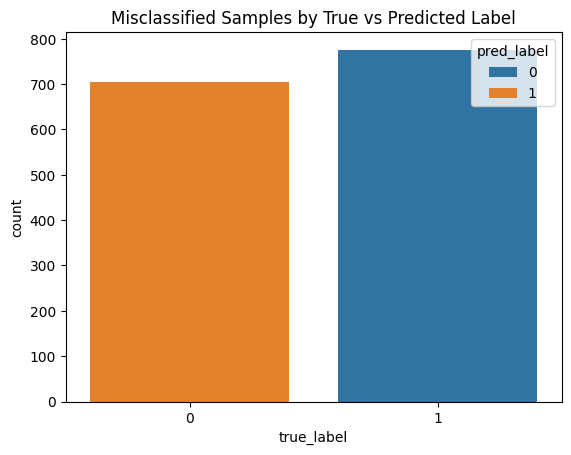

In [50]:
# Create a DataFrame with test data, true labels, and predicted labels
df_results = pd.DataFrame({
    'text': X_test,              # original text data
    'true_label': Y_test,
    'pred_label': test_preds3
})

# Filter misclassified samples
misclassified = df_results[df_results['true_label'] != df_results['pred_label']]

# Display first 10 misclassified samples
print(misclassified.head(10))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='true_label', hue='pred_label', data=misclassified)
plt.title("Misclassified Samples by True vs Predicted Label")
plt.show()


# K-Nearest Neighbour

### Tf-Idf vectorizer

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on test is:  0.6221061873296059
--------------------------------------------------


In [53]:
#Confusion matrix
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix test is:  [[ 2489  8003]
 [  175 10974]]
Wrong predictions out of total
--------------------------------------------------
8178 / 21641
--------------------------------------------------


### Count vectorizer

In [54]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(count_train,Y_train)

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.8328679222862575
Model accuracy on test is:  0.778799500947276
--------------------------------------------------


In [55]:
#Confusion matrix
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix test is:  [[7778 2714]
 [2073 9076]]
Wrong predictions out of total
--------------------------------------------------
4787 / 21641
--------------------------------------------------


## Logistic Regression

### Tf-Idf vectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


# -----------------------------
# 2. Logistic Regression model
# -----------------------------
lr = LogisticRegression(max_iter=2000, solver='lbfgs')

# Train
lr.fit(tfidf_train, Y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
test_preds = lr.predict(tfidf_test)

# -----------------------------
# 4. Accuracy
# -----------------------------
print("Test Accuracy :", accuracy_score(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 5. Classification Report
# -----------------------------
print("Classification Report:")
print(classification_report(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_preds))


Test Accuracy : 0.9395591700938034
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10492
           1       0.93      0.95      0.94     11149

    accuracy                           0.94     21641
   macro avg       0.94      0.94      0.94     21641
weighted avg       0.94      0.94      0.94     21641

--------------------------------------------------
Confusion Matrix:
[[ 9739   753]
 [  555 10594]]


### Count Vectorizer

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# -----------------------------
# 2. Logistic Regression model
# -----------------------------
lr = LogisticRegression(max_iter=2000, solver='lbfgs')

# Train
lr.fit(count_train, Y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
test_preds = lr.predict(count_test)

# -----------------------------
# 4. Accuracy
# -----------------------------
print("Test Accuracy :", accuracy_score(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 5. Classification Report
# -----------------------------
print("Classification Report:")
print(classification_report(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_preds))



Test Accuracy : 0.951480985167044
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10492
           1       0.94      0.96      0.95     11149

    accuracy                           0.95     21641
   macro avg       0.95      0.95      0.95     21641
weighted avg       0.95      0.95      0.95     21641

--------------------------------------------------
Confusion Matrix:
[[ 9866   626]
 [  424 10725]]


## SVM Classifier

### Tf-Idf vectorizer

In [58]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. Linear SVM Model
# -----------------------------
svm = LinearSVC()

# Train
svm.fit(tfidf_train, Y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
test_preds = svm.predict(tfidf_test)

# -----------------------------
# 4. Accuracy
# -----------------------------
print("Test Accuracy :", accuracy_score(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 5. Classification Report
# -----------------------------
print("Classification Report:")
print(classification_report(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_preds))


Test Accuracy : 0.9567487639203364
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     10492
           1       0.95      0.96      0.96     11149

    accuracy                           0.96     21641
   macro avg       0.96      0.96      0.96     21641
weighted avg       0.96      0.96      0.96     21641

--------------------------------------------------
Confusion Matrix:
[[ 9956   536]
 [  400 10749]]


### Count vectorizer

In [59]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. Linear SVM Model
# -----------------------------
svm = LinearSVC()

# Train
svm.fit(count_train, Y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
test_preds = svm.predict(count_test)

# -----------------------------
# 4. Accuracy
# -----------------------------
print("Test Accuracy :", accuracy_score(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 5. Classification Report
# -----------------------------
print("Classification Report:")
print(classification_report(Y_test, test_preds))
print("-"*50)

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_preds))


Test Accuracy : 0.9424703109837808
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10492
           1       0.94      0.95      0.94     11149

    accuracy                           0.94     21641
   macro avg       0.94      0.94      0.94     21641
weighted avg       0.94      0.94      0.94     21641

--------------------------------------------------
Confusion Matrix:
[[ 9800   692]
 [  553 10596]]


d:\env\anaconda3\envs\somaenv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
